In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

### Read image & Convert image to gray-scale

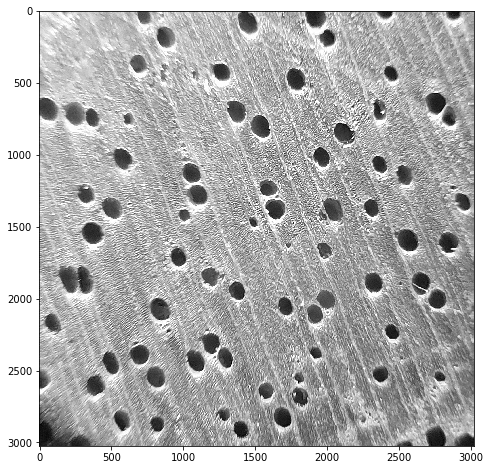

In [2]:
image = 'Asset/19081.jpg'
#image = 'Asset/6867.jpg'
#image = 'Asset/14734.jpg'
#image = 'Asset/10E1P451.jpg'
#image = 'Asset/20809.jpg'
#image = 'Asset/23255.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
M, N = img.shape

kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel_sharpening)

plt.rcParams["figure.figsize"] = (8,8)
plt.imshow(img, cmap='gray')

## Blur Image to Reduce Noise

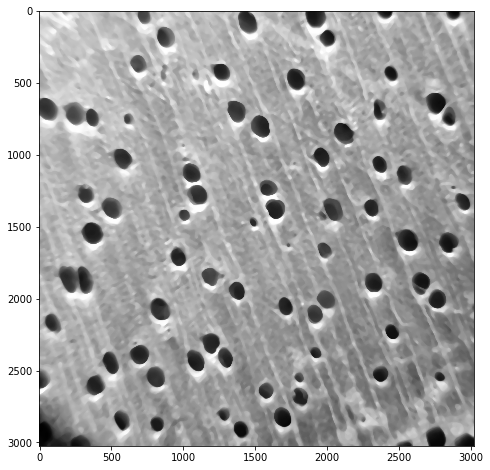

In [3]:
#img = cv2.GaussianBlur(img, (21, 21), cv2.BORDER_DEFAULT)
for _ in range(3):
    img = cv2.medianBlur(img, 21)

plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img, cmap='gray')

## Image Thresholding

#### 1. Image Thresholding (Otsu's Binarization)

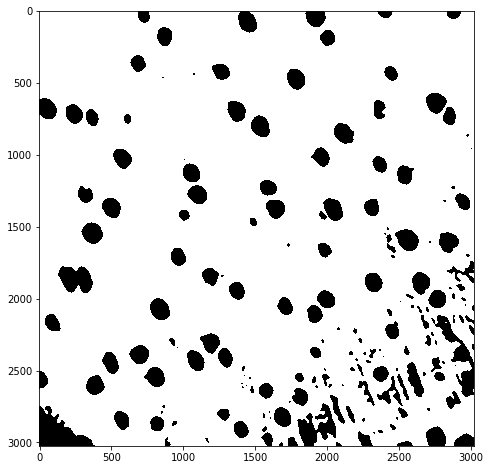

In [4]:
ret, th = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(th, cmap='gray')

#### 2. Image Thresholding (Adaptive Thresholding)

In [5]:
#th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
#                           cv2.THRESH_BINARY, 31, 20)
#plt.rcParams["figure.figsize"] = (8, 8)
#plt.imshow(th, cmap='gray')

## Apply hough transform on the image

In [6]:
#all_circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 60, param1=100, 
#                              param2=20, minRadius=30, maxRadius=60)

all_circle = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 100, 
                              param1=130,param2=20, 
                              minRadius=10, maxRadius=150)

In [7]:
if all_circle is not None:
    all_circle_rounded = np.uint16(np.around(all_circle))
    for i in all_circle_rounded[0,:]:
        # draw the outer circle
        cv2.circle(img_orig,(i[0],i[1]),i[2],(0,255,0),15)
        # draw the center of the circle
        cv2.circle(img_orig,(i[0],i[1]),2,(0,0,255),5)

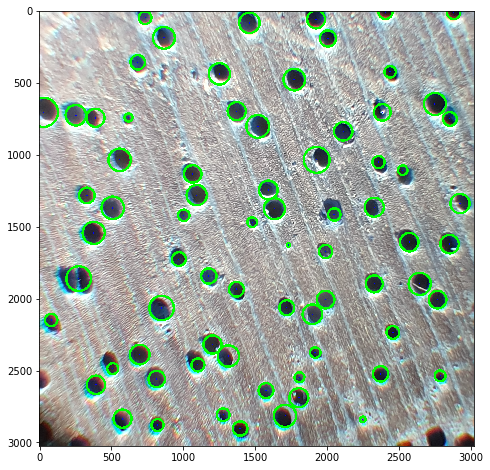

In [8]:
plt.rcParams["figure.figsize"] = (8, 8)
plt.imshow(img_orig)

## Detected Circles

In [9]:
print(all_circle_rounded)
all_circle_rounded = all_circle_rounded[0].tolist()
detected_circle = len(all_circle_rounded)
print('Detected circle = ', str(detected_circle))

[[[2770 2006   61]
  [1774  476   75]
  [ 380 1542   77]
  [2008  190   56]
  [1096 1280   70]
  [ 700 2388   68]
  [1636 1374   73]
  [1520  802   79]
  [1710 2814   77]
  [2646 1896   77]
  [2752  646   77]
  [ 868  186   76]
  [ 686  356   50]
  [1254  436   74]
  [2574 1606   64]
  [1578 2638   52]
  [  30  704  101]
  [1930 1034   90]
  [1900 2108   68]
  [1992 2006   61]
  [1374  696   63]
  [ 818 2558   57]
  [2440  422   40]
  [2408    6   49]
  [ 972 1724   48]
  [1068 1132   61]
  [2330 1896   59]
  [2360 1050   42]
  [2114  836   64]
  [1006 1420   40]
  [2374 2522   53]
  [ 560 1034   78]
  [ 392  742   63]
  [1104 2460   45]
  [1594 1244   65]
  [1206 2318   63]
  [2460 2234   44]
  [1722 2062   52]
  [ 396 2598   64]
  [ 852 2064   85]
  [1372 1934   51]
  [2788 2536   37]
  [ 512 1368   78]
  [1806 2688   66]
  [2926 1338   67]
  [1920 2374   36]
  [ 276 1860   86]
  [ 332 1282   54]
  [1316 2398   74]
  [2330 1364   66]
  [1398 2902   50]
  [1280 2806   44]
  [ 512 2486

###### Average Radius

In [10]:
radius_avg = 0
for i in all_circle_rounded:
    print(i[2])
    radius_avg += i[2]
radius_avg = radius_avg/len(all_circle_rounded)
print('Radius average = ', str(radius_avg))

61
75
77
56
70
68
73
79
77
77
77
76
50
74
64
52
101
90
68
61
63
57
40
49
48
61
59
42
64
40
53
78
63
45
65
63
44
52
64
85
51
37
78
66
67
36
86
54
74
66
50
44
38
62
46
71
71
44
53
43
28
42
34
63
34
64
43
58
48
33
46
19
12
Radius average =  57.83561643835616


###### Circle Density

> Calculate density ver.1

In [11]:
dens = (detected_circle * radius_avg) / (M * N)
print('Ver.1 Density = ', str(dens))

Ver.1 Density =  0.0004616944514431287
